-1.6
-1.28
-1.024
-0.8192
-0.65536


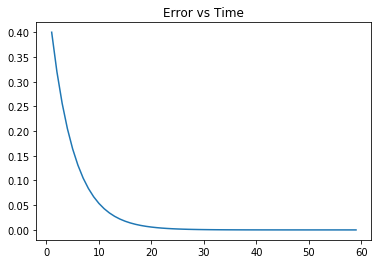

-1.6
-1.28
-1.024
-0.8192
-0.65536
-1.6
-1.28
-1.024
-0.8192
-0.65536
-1.6
-1.28
-1.024
-0.8192
-0.65536
-1.6
-1.28
-1.024
-0.8192
-0.65536
-1.6
-1.28
-1.024
-0.8192
-0.65536


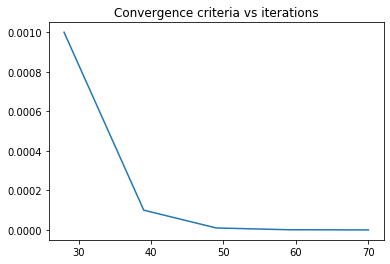

-1.6
-1.28
-1.024
-0.8192
-0.65536
2
-2
2
-2
2
3.2
-5.12
8.192
-13.107200000000002
20.97152


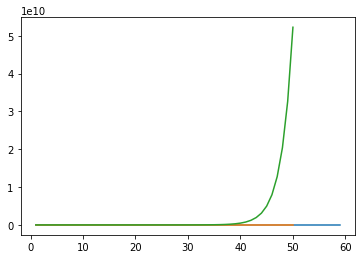

In [9]:
import numpy as np
import matplotlib.pyplot as plt


def gradientDescent(x_val, rate, pr, max_itr):
    itr = 0
    previous = 1
    first = 0
    arr = np.zeros(1000)
    while previous > pr and itr < max_itr:
        x_prev = x_val
        x_val = x_val - rate * 2 * x_prev
        if first < 5:
            print(x_val)
            first = first + 1
        previous = np.abs(x_prev - x_val)
        arr[itr] = previous
        itr = itr + 1
    return itr, arr


# For Calculating Error vs Time
itr, arr = gradientDescent(-2, 0.1, 0.000001, 1000)
plt.plot(np.arange(1, itr + 1), arr[:itr])
plt.title('Error vs Time')
plt.show()

# For calculating convergence criteria
cr = [0.0000001, 0.000001, 0.00001, 0.0001, 0.001]
it = np.zeros(5)
for i in range(5):
    it[i], arr = gradientDescent(-2, 0.1, cr[i], 1000)
plt.plot(it, cr)
plt.title('Convergence criteria vs iterations')
plt.show()

# For convergence , divergence, and oscillation
# learning rate = 0.1 for convergence
# learning rate = 1 for divergence
# learning rate = 1.3 for oscillation
itr1, arr1 = gradientDescent(-2, 0.1, 0.000001, 500)
itr2, arr2 = gradientDescent(-2, 1, 0.000001, 50)
itr3, arr3 = gradientDescent(-2, 1.3, 0.000001, 50)

plt.plot(np.arange(1, itr1 + 1), arr1[:itr1])
plt.plot(np.arange(1, itr2 + 1), arr2[:itr2])
plt.plot(np.arange(1, itr3 + 1), arr3[:itr3])
plt.show()

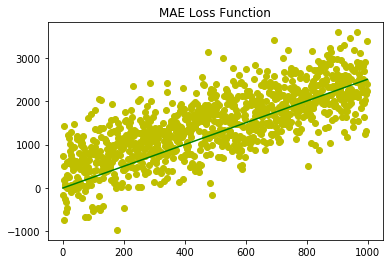

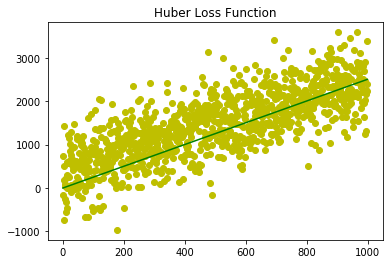

In [10]:
import numpy as np
import matplotlib.pyplot as plt

#random = np.random.normal(1,0.5,1000)
def get_line(m,b,x):
    y = m*x + b
    return y
   
def add_noise(mu,sigma):
    noise = np.random.normal(mu,sigma,1000)
    x_list=[]
    y_list=[]
    for noise,i in zip(noise,range(1000)):
        x_list.append(i)
        y_list.append(get_line(2,1,i)+500*noise)
    return x_list,y_list

def update_weights_MAE(m, b, X, Y, learning_rate):
    m_deriv = 0
    b_deriv = 0
    N = len(X)
    for i in range(N):
        # Calculate partial derivatives
        # -x(y - (mx + b)) / |mx + b|
        m_deriv += - X[i] * (Y[i] - (m*X[i] + b)) / abs(Y[i] - (m*X[i] + b))

        # -(y - (mx + b)) / |mx + b|
        b_deriv += -(Y[i] - (m*X[i] + b)) / abs(Y[i] - (m*X[i] + b))

    # We subtract because the derivatives point in direction of steepest ascent
    m -= (m_deriv / float(N)) * learning_rate
    b -= (b_deriv / float(N)) * learning_rate

    return m, b

def update_weights_Huber(m, b, X, Y, delta, learning_rate):
    m_deriv = 0
    b_deriv = 0
    N = len(X)
    for i in range(N):
        # derivative of quadratic for small values and of linear for large values
        if abs(Y[i] - m*X[i] - b) <= delta:
          m_deriv += -X[i] * (Y[i] - (m*X[i] + b))
          b_deriv += - (Y[i] - (m*X[i] + b))
        else:
          m_deriv += delta * X[i] * ((m*X[i] + b) - Y[i]) / abs((m*X[i] + b) - Y[i])
          b_deriv += delta * ((m*X[i] + b) - Y[i]) / abs((m*X[i] + b) - Y[i])
   
    # We subtract because the derivatives point in direction of steepest ascent
    m -= (m_deriv / float(N)) * learning_rate
    b -= (b_deriv / float(N)) * learning_rate

    return m, b

def Converge_MAE(x):
    m,b = 2,1
    m_new,b_new=0,0
    while(1):
        m_new,b_new=update_weights_MAE(m,b,x,y,0.001)
        #print(m_new," ",b_new)
        if(np.abs(np.abs(m)-np.abs(m_new))<0.1):
            break;
        m,b=m_new,b_new
    y1=[]
    for i in range(1000):
        y1.append(get_line(m,b,x[i]))
    return y1  

def Converge_Huber(x):
    m,b = 2,1
    m_new,b_new=0,0
    while(1):
        m_new,b_new=update_weights_Huber(m,b,x,y,1,0.001)
        #print(m_new," ",b_new)
        if(np.abs(np.abs(m)-np.abs(m_new))<0.1):
            break;
        m,b=m_new,b_new
    y1=[]
    for i in range(1000):
        y1.append(get_line(m,b,x[i]))
    return y1

x,y = add_noise(1,1)
ymae = Converge_MAE(x)
yhub = Converge_Huber(x)

plt.plot(x,y,'o',color='y')
plt.title('MAE Loss Function')
plt.plot(x,ymae,color='g')
plt.show()

plt.plot(x,y,'o',color='y')
plt.title('Huber Loss Function')
plt.plot(x,yhub,color='g')
plt.show()

c:\users\pc\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: This function is deprecated. Please call randint(0, 1 + 1) instead
  


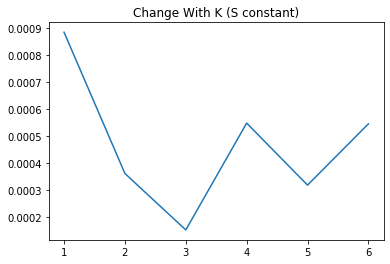

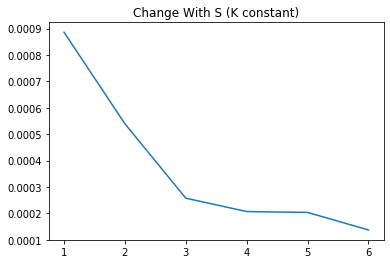

In [11]:
import numpy as np
import matplotlib.pyplot as plt


def createSet(s, k):
    data = np.random.random_integers(0, 1, (s * k))
    var = 0
    mean = np.zeros(s)
    like = np.zeros(s)
    for i in range(s):
        mean[i] = np.mean(data[i*k : i*k + s-1])
    for i in range(s):
        like[i] = (1/np.sqrt(2*np.pi))*np.exp((-1/2)*(np.square(mean[i])))
    var = np.var(like)
    return var


v = createSet(10, 10)
kdiff = [10, 15, 20, 25, 30, 35]
vK = np.zeros(6)
for i in range(6):
    vK[i] = createSet(10, kdiff[i])
plt.plot(np.arange(1,7), vK)
plt.title('Change With K (S constant)')
plt.show()

sdiff = [10, 15, 20, 25, 30, 35]
vs = np.zeros(6)
for i in range(6):
    vs[i] = createSet(sdiff[i], 10)
plt.plot(np.arange(1,7), vs)
plt.title('Change With S (K constant)')
plt.show()